# Pymaceuticals Inc.

In [394]:
# Dependencies and Setup
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Pymaceuticals_df = pd.merge(study_results,mouse_metadata,on = 'Mouse ID')

# Display the data table for preview
Pymaceuticals_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [101]:
# Checking the number of mice.
No_Mice = len(Pymaceuticals_df['Mouse ID'].unique())
print(f" Total number of Unique Mice: {No_Mice}")

 Total number of Unique Mice: 249


In [395]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Duplicates_df = Pymaceuticals_df[Pymaceuticals_df.duplicated(["Mouse ID","Timepoint"])]

In [396]:
# Optional: Get all the data for the duplicate mouse ID. 
Duplicates_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [404]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_Pymaceuticals_df = Pymaceuticals_df.drop(Pymaceuticals_df[Pymaceuticals_df['Mouse ID'] == 'g989'].index)

In [405]:
# Checking the number of mice in the clean DataFrame.
No_Mice = len(clean_Pymaceuticals_df['Mouse ID'].unique())
print(f" Total number of Unique Mice: {No_Mice}")

 Total number of Unique Mice: 248


## Summary Statistics

In [278]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
grouped_Pymaceuticals_df = Pymaceuticals_df.groupby(['Drug Regimen'])
print(grouped_Pymaceuticals_df)

# Mean of the tumor volume for each regimen
tumorvol_mean = grouped_Pymaceuticals_df['Tumor Volume (mm3)'].mean()
# Median of the tumor volume for each regimen
tumorvol_median = grouped_Pymaceuticals_df['Tumor Volume (mm3)'].median()
# Variance of the tumor volume for each regimen
tumorvol_var = grouped_Pymaceuticals_df['Tumor Volume (mm3)'].var()
# Std DEV of the tumor volume for each regimen
tumorvol_stdev = grouped_Pymaceuticals_df['Tumor Volume (mm3)'].std()
# SEM of the tumor volume for each regimen
tumorvol_sem = grouped_Pymaceuticals_df['Tumor Volume (mm3)'].sem()

Summary = pd.merge(tumorvol_mean,tumorvol_median,on = 'Drug Regimen')
Summary1 = pd.merge(Summary,tumorvol_var,on = 'Drug Regimen')
Summary2 = pd.merge(Summary1,tumorvol_stdev,on = 'Drug Regimen')
Summary3 = pd.merge(Summary2,tumorvol_sem,on = 'Drug Regimen')
Summary3.reset_index(inplace=True)
Summary3.columns = ["Drug Regimen","Mean Tumor Volume","Median Tumor Volume","Tumor Volume Vairance","Tumor Volume Std. Dev.","Tumor Volume Std. Err."]
Summary3

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Vairance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
Pymaceuticals_summary = pd.DataFrame(Pymaceuticals_df.groupby(['Drug Regimen']).agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]}))
Pymaceuticals_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

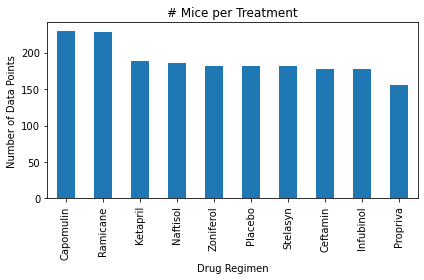

,Data_Points
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


In [298]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
# Filter the DataFrame down only to those columns to chart

Pymaceuticals_summary = pd.DataFrame(Pymaceuticals_df.groupby("Drug Regimen").agg({"Drug Regimen":["count"]}))
Pymaceuticals_summary.reset_index(inplace=True)
Pymaceuticals_summary.columns = ["Drug Regimen","Data_Points"]

Sorted_summary = Pymaceuticals_summary.sort_values(by = ["Data_Points"],ascending = False)
Sorted_summary.set_index("Drug Regimen",inplace = True)
# Use DataFrame.plot() in order to create a bar chart of the data
Sorted_summary.plot(kind="bar",legend = False)

# Set a title for the chart
plt.title("# Mice per Treatment")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')

plt.tight_layout()
plt.show()

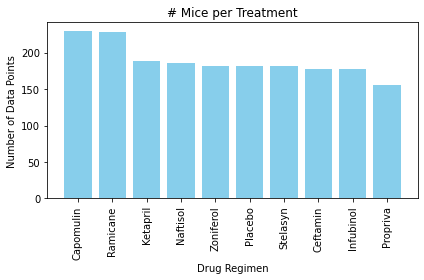

In [306]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
Pymaceuticals_summary = pd.DataFrame(Pymaceuticals_df.groupby("Drug Regimen").agg({"Drug Regimen":["count"]}))
Pymaceuticals_summary.reset_index(inplace=True)
Pymaceuticals_summary.columns = ["Drug Regimen","Data_Points"]

Sorted_summary = Pymaceuticals_summary.sort_values(by = ["Data_Points"],ascending = False)
Sorted_summary.reset_index(inplace=True)

x_axis = np.arange(len(Sorted_summary["Drug Regimen"]))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, Sorted_summary["Data_Points"], color='skyblue', alpha=1, align="center") 

plt.xticks(tick_locations, Sorted_summary["Drug Regimen"], rotation="vertical")

plt.title("# Mice per Treatment")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')

plt.tight_layout() 
plt.show()

<AxesSubplot:ylabel='Sex'>

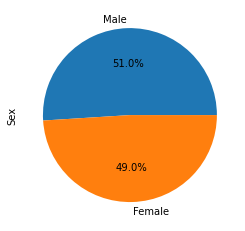

In [370]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Grouping the Dataframe by Gender

perc = round((Pymaceuticals_df["Sex"].value_counts()/len(Pymaceuticals_df.value_counts()))*100)

perc.plot(kind="pie",autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x14fbfe4ad60>,
 [Text(-0.14208472626803478, 1.1915586139847834, 'Male'),
  Text(0.13024433241236533, -1.0922620628193846, 'Female')],
 [Text(-0.08288275698968695, 0.6950758581577902, '51.0%'),
  Text(0.07104236313401743, -0.5957793069923916, '49.0%')])

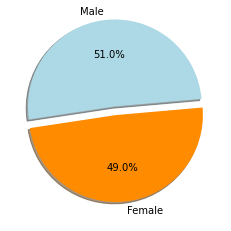

In [372]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

perc = round((Pymaceuticals_df["Sex"].value_counts()/len(Pymaceuticals_df.value_counts()))*100)

# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
values = perc

# The colors of each section of the pie chart
colors = ["lightblue","darkorange"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(values, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=5)

## Quartiles, Outliers and Boxplots

In [156]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Select_regimens = Pymaceuticals_df[(Pymaceuticals_df['Drug Regimen']=='Capomulin') | (Pymaceuticals_df['Drug Regimen']=='Ramicane')
                                  | (Pymaceuticals_df['Drug Regimen']=='Infubinol')| (Pymaceuticals_df['Drug Regimen']=='Ceftamin')]

regimens_summary = pd.DataFrame(Select_regimens.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["sum"]}))
regimens_summary.reset_index(inplace=True)
regimens_summary.columns = ["Drug Regimen","Total Tumor Volume (mm3)"]

# Start by getting the last (greatest) timepoint for each mouse
Last_timepoint = pd.DataFrame(Select_regimens.groupby("Drug Regimen").agg({"Timepoint":["max"]}))
Last_timepoint.reset_index(inplace=True)
Last_timepoint.columns = ["Drug Regimen","Timepoint"]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Group_df = pd.merge(regimens_summary,Last_timepoint,on = 'Drug Regimen')
Group_df

,Drug Regimen,Total Tumor Volume (mm3),Timepoint
0,Capomulin,9355.420462,45
1,Ceftamin,9361.228582,45
2,Infubinol,9413.493529,45
3,Ramicane,9169.417875,45


In [440]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments = Group_df['Drug Regimen']

# Create empty list to fill with tumor vol data (for plotting)
Tumor_Vol = []              

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Capomulin Regimen
Tumorvol_Capomulin = Pymaceuticals_df.loc[(Pymaceuticals_df['Drug Regimen']=='Capomulin'),'Tumor Volume (mm3)']
quartiles_Capomulin = Tumorvol_Capomulin.quantile([.25,.5,.75])
lowerq_Capomulin = quartiles_Capomulin[0.25]
upperq_Capomulin = quartiles_Capomulin[0.75]
iqr_Capomulin = upperq_Capomulin-lowerq_Capomulin
lower_bound_Capomulin = round(lowerq_Capomulin - (1.5*iqr),2)
upper_bound_Capomulin = round(upperq_Capomulin + (1.5*iqr),2)
#Ramicane Regimen 
Tumorvol_Ramicane = Pymaceuticals_df.loc[(Pymaceuticals_df['Drug Regimen']=='Ramicane'),'Tumor Volume (mm3)']
quartiles_Ramicane = Tumorvol_Ramicane.quantile([.25,.5,.75])
lowerq_Ramicane = quartiles_Ramicane[0.25]
upperq_Ramicane = quartiles_Ramicane[0.75]
iqr_Ramicane = upperq_Ramicane-lowerq_Ramicane
lower_bound_Ramicane = round(lowerq_Ramicane - (1.5*iqr),2)
upper_bound_Ramicane = round(upperq_Ramicane + (1.5*iqr),2)
#Infubinol Regimen 
Tumorvol_Infubinol = Pymaceuticals_df.loc[(Pymaceuticals_df['Drug Regimen']=='Infubinol'),'Tumor Volume (mm3)']
quartiles_Infubinol = Tumorvol_Infubinol.quantile([.25,.5,.75])
lowerq_Infubinol = quartiles_Infubinol[0.25]
upperq_Infubinol = quartiles_Infubinol[0.75]
iqr_Infubinol = upperq_Infubinol-lowerq_Infubinol
lower_bound_Infubinol = round(lowerq_Infubinol - (1.5*iqr),2)
upper_bound_Infubinol = round(upperq_Infubinol + (1.5*iqr),2)
#Ramicane Regimen 
Tumorvol_Ceftamin = Pymaceuticals_df.loc[(Pymaceuticals_df['Drug Regimen']== 'Ceftamin'),'Tumor Volume (mm3)']
quartiles_Ceftamin = Tumorvol_Ceftamin.quantile([.25,.5,.75])
lowerq_Ceftamin = quartiles_Ceftamin[0.25]
upperq_Ceftamin = quartiles_Ceftamin[0.75]
iqr_Ceftamin = upperq_Ceftamin-lowerq_Ceftamin
lower_bound_Ceftamin = round(lowerq_Ceftamin - (1.5*iqr),2)
upper_bound_Ceftamin = round(upperq_Ceftamin + (1.5*iqr),2)

print(f"Values below {lower_bound_Capomulin} and above {upper_bound_Capomulin} could be outliers for Capomulin Regimen.")
print(f"Values below {lower_bound_Ramicane} and above {upper_bound_Ramicane} could be outliers for Ramicane Regimen.")
print(f"Values below {lower_bound_Infubinol} and above {upper_bound_Infubinol} could be outliers for Infubinol Regimen.")
print(f"Values below {lower_bound_Ceftamin} and above {upper_bound_Ceftamin} could be outliers for Ceftamin Regimen.")      

Values below 26.71 and above 55.97 could be outliers for Capomulin Regimen.
Values below 25.7 and above 55.97 could be outliers for Ramicane Regimen.
Values below 36.34 and above 68.29 could be outliers for Infubinol Regimen.
Values below 36.24 and above 67.77 could be outliers for Ceftamin Regimen.


{'whiskers': [<matplotlib.lines.Line2D at 0x14fc1d9bee0>,
 'caps': [<matplotlib.lines.Line2D at 0x14fc1d9be50>,
 'boxes': [<matplotlib.lines.Line2D at 0x14fc1a7c2b0>,
 'medians': [<matplotlib.lines.Line2D at 0x14fbfd9bb20>,
 'fliers': [<matplotlib.lines.Line2D at 0x14fc1c51640>,
 'means': []}

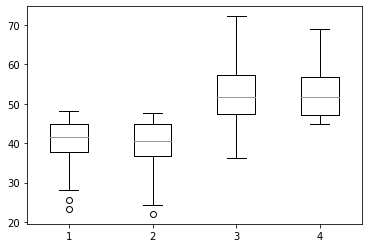

In [441]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Capomulin = Tumorvol_Capomulin
Ramicane = Tumorvol_Ramicane
Infubinol = Tumorvol_Infubinol
Ceftamin = Tumorvol_Ceftamin
plt.boxplot ([Capomulin, Ramicane, Infubinol,Ceftamin])

## Line and Scatter Plots

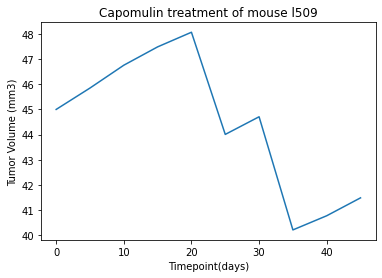

In [105]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Pymaceuticals_capomulin = Pymaceuticals_df.loc[(Pymaceuticals_df['Drug Regimen']=='Capomulin')]
Pymaceuticals_capomulinv2 = Pymaceuticals_capomulin.loc[(Pymaceuticals_df['Mouse ID']=='l509')]

x_axis = Pymaceuticals_capomulinv2['Timepoint']
y_axis = Pymaceuticals_capomulinv2['Tumor Volume (mm3)']
plt.plot(x_axis, y_axis)
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

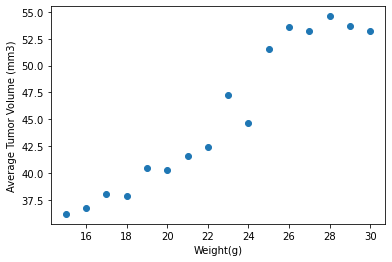

In [414]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Pymaceuticals_capomulin = Pymaceuticals_df.loc[(Pymaceuticals_df['Drug Regimen']=='Capomulin')]

Pymaceuticals_plt = pd.DataFrame(Pymaceuticals_df.groupby("Weight (g)").agg({"Tumor Volume (mm3)":["mean"]}))
Pymaceuticals_plt.reset_index(inplace=True)
Pymaceuticals_plt.columns = ["Weight (g)","Av Tumor Volume (mm3)"]

x_values = Pymaceuticals_plt['Weight (g)']
y_values = Pymaceuticals_plt['Av Tumor Volume (mm3)']
plt.scatter(x_values,y_values)
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.96


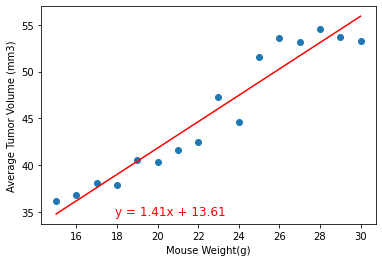

In [412]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = Pymaceuticals_plt['Weight (g)']
y_values = Pymaceuticals_plt['Av Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,xy=(0.3,0.18),xycoords='figure fraction',horizontalalignment = 'left',fontsize = 12,color = "red")
plt.xlabel('Mouse Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
plt.show()